# Computational pipeline in Python using `scikit-learn` and `pandas`

In this example we'll visualize, preprocess, and train a classification model for the well-known `iris` dataset. We'll use computational pipelines from `pandas` and `scikit-learn` to make this easy.

First, we'll install any needed dependencies:

In [58]:
%%capture
!pip install numpy scikit-learn pandas matplotlib
import sklearn
import sklearn.datasets
import pandas
import numpy as np
import matplotlib.pyplot as plt

And load the `iris` dataset as a [Pandas DataFrame](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html).

In [21]:
dataset = sklearn.datasets.load_iris(as_frame=True)
inputs = dataset.data
targets = dataset.target

## Explore & visualize the data
Let's view some summary statistics of the data.

In [22]:
inputs.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Let's plot the input data in two dimensions, colored by the target, using principal components analysis.

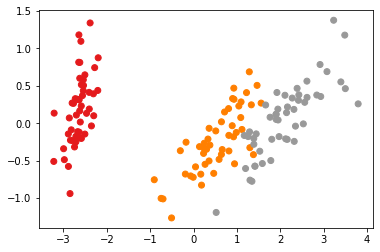

In [29]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X = pca.fit_transform(inputs.values)
plt.scatter(X[:,0], X[:,1], c=targets, cmap=plt.cm.Set1)

## Preprocess the data
Before performing a classification, we often want to normalize and scale each feature by its mean and standard deviation. The formula for this is:

$$
\hat{x} = \frac{x - \mu}{\sigma}
$$

In [32]:
scaled_inputs = inputs.copy()
for column in scaled_inputs.columns:
    scaled_inputs[column] = (scaled_inputs[column] -  scaled_inputs[column].mean()) /  scaled_inputs[column].std()
scaled_inputs.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-5.684342e-16,-7.815970e-16,-2.842171e-16,-3.789561e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.863780e+00,-2.425820e+00,-1.562342e+00,-1.442245e+00
25%,-8.976739e-01,-5.903951e-01,-1.222456e+00,-1.179859e+00
50%,-5.233076e-02,-1.315388e-01,3.353541e-01,1.320673e-01
75%,6.722490e-01,5.567457e-01,7.602115e-01,7.880307e-01
max,2.483699e+00,3.080455e+00,1.779869e+00,1.706379e+00


## Feature selection
There are 6 possible combinations of 2-dimensional features we can select. Let's visualize them to see which ones separate the training data best.

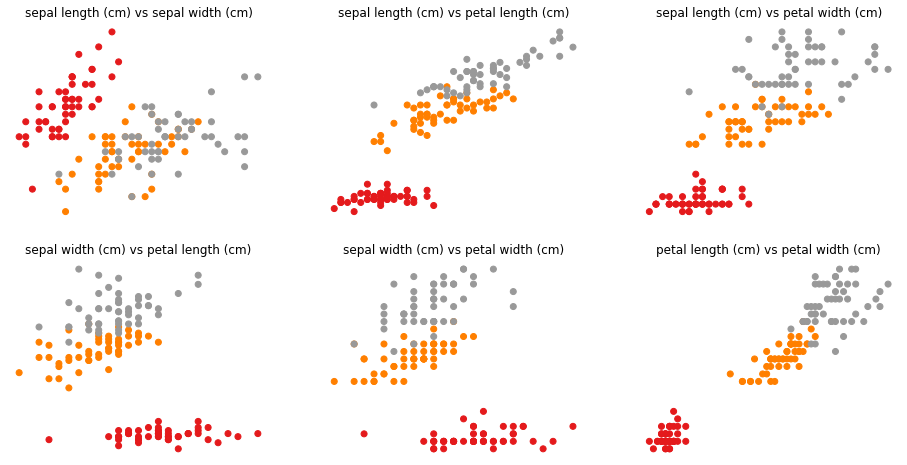

In [42]:
from itertools import combinations
fig, axs = plt.subplots(2, 3, figsize=(16, 8))
i = 0
for (f1, f2) in combinations(inputs.columns, 2):
    row, col = i // 3, i % 3
    axs[row][col].scatter(scaled_inputs[f1], scaled_inputs[f2], c=targets, cmap=plt.cm.Set1)
    axs[row][col].title.set_text(f'{f1} vs {f2}')
    axs[row][col].axis('off')
    i += 1

Based on this, we may either use one of the feature pairs above or the 2-dimensional PCA embedding. For simplicity we'll use `petal length` and `petal width`.

In [47]:
model_inputs = scaled_inputs[['petal length (cm)', 'petal width (cm)']]

## Training a model
We'll now feed our scaled and extracted features to a logistic regression model with regularization constant `C=1e5`.

In [50]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(C=1e5)
model.fit(model_inputs.values, targets.values)

LogisticRegression(C=100000.0)

Now we'll plot the model's hypothesis.

Text(0, 0.5, 'petal width (cm)')

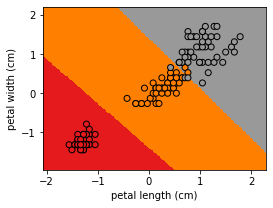

In [57]:
X = model_inputs.values
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
h = 0.02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Set1)
plt.scatter(X[:, 0], X[:, 1], c=targets, edgecolors="k", cmap=plt.cm.Set1)
plt.xlabel(model_inputs.columns[0])
plt.ylabel(model_inputs.columns[1])

And our final accuracy is:

In [56]:
model.score(X, targets)

0.96